# Learning goals
After today's lesson you should be able to:
- Get Census data from the IPUMS/NHGIS data portal
- Get Census data with cenpy
- Use the Socrata API


Some of today's lessons borrow from: 
- [The cenpy documentation](https://github.com/cenpy-devs/cenpy)
- [The Socrata SODA API documentation](https://dev.socrata.com/consumers/getting-started.html)

In [3]:
# We are going to start importing the libraries we need
# all in one cell. 
# It is a good practice to keep all the imports in one cell so that
# we can easily see what libraries we are using in the notebook.
import pandas as pd
import numpy as np
import geopandas as gpd
import os

import matplotlib.pyplot as plt
import seaborn as sns

## The set_context() function is really useful!
## It allows us to set the size of the fonts in our plots based on whether 
## we are making a poster, a talk, a notebook, etc.

## If you are only presenting these figures in your jupyter notebook, 
## there is no need to set the context to be "talk" or "poster"
## But, I sometimes set my context to be "talk" or "poster" even for articles
## because I like the fonts to be bigger.
sns.set_context(context='paper')

# we use the inline backend to generate the plots within the browser
%matplotlib inline

os.getcwd()

'/Users/wenfeixu/Documents/GITHUB/4680_5680_intro_uds_draft/Week5'


# 0. Census Data: Census survey and statistical boundaries

## 0.1 Census Surveys
The United States Census Bureau has been collecting information on its residents in the country since 1780 through surveys sent by mail (since 2020, you can submit your survey by phone, mail, or online). Census data is used for a variety of governmental purposes including: provision of housing, infrastructure, and public amenities; making districting decisions for schools, precints, and elections; and more generally, to understand the population, socio-economic, and demographic characteristics of residents in the country. [Did you know that the punch card machine (a prototype for the computer) was created for the 1890 Census?](https://en.wikipedia.org/wiki/Tabulating_machine)

The US Census has historically been taken every 10 years. Every household in the U.S. is sent a Census survey (and you are legally required to respond.) In 2005, the Census Bureau created the American Community Survey (ACS), which is collected every month on a sample of households.

Since 2020, the Census only contains 10 questions (historically called the "short form census") such as age, sex, race, Hispanic origin, and owner/renter status. The ACS contains a larger set of questions such as employment, education, transportation.

Because the ACS is more frequent, it is often used for more current census needs; however, because it is also a sample, we generally need a longer time span to get a robust sample. This is why we will often use the **5-yr ACS** (for ex: 2012 - 2016 ACS) to represent the year (here, 2014).

Census data is often the baseline survey dataset in the area of urban planning because it provides racial, socio-economic, housing, etc. information that is often the highlight or backdrop of a study.

## 0.2 Census Geographies
There are different, often nested Census geographic regions used for  different administrative scales. The most commonly used regions are statistical areas, typically nested within each other, whose boundaries are defined by certain physical, administrative, and population constraints. For instance, a **Census block** is bounded by physical features such as streets and administrative boundaries such as city limits and school districts. **Block groups**, the smallest unit of analysis that is still mostly statistically robust, are collections of Census blocks (hence the name) that generally have between 800 to 5000 people. **Census tracts** generally have between 1000 and 8000 people. [Here's more information](https://pitt.libguides.com/uscensus/understandinggeography) about Census geographies if you're curious.

See the image below for how these regions nest within one another.

</figure>
<img src="https://www.dropbox.com/s/8w69pibhwffgoc0/qgis_censusgeography.png?dl=1" alt="drawing" width="500" style="display: block; margin: 0 auto"/>
</figure>


## 0.3 [Social Explorer](https://www-socialexplorer-com.proxy.library.cornell.edu/ezproxy)
This is a great tool for looking at Census and ACS data visually. They also have datasets beyond just Census Bureau data. You can also output images and shareable links to the map. I encourage you to sign up (through Cornell it's free) and explore this tool on your own time.



# 1. IPUMS

I have found that the easiest way to query and download a large Census dataset is to use a service provided by [IPUMS](https://www.ipums.org/)

You will see that IPUMS provides data from various sources, including the Census Bureau, the Bureau of Labor Statistics, the National Science Foundation, the National Center for Health Statistics, the Centers for Disease Control, and the National Aeronautics and Space Administration. According to IPUMS, there is also census or survey data available for over 100 countries. For US data, there is Census data going back to 1790.

Here, we are using Census data from IPUM's [National Historical Geographic Information System](https://www.nhgis.org/) (NHGIS).

## 1.1 Getting started with IPUMS

First you'll need to register an account here:
https://uma.pop.umn.edu/nhgis/user/new

IPUMS will also send you an email verification.

From the [NHGIS website](https://www.nhgis.org/), click on **Get Data**. This should take you to a page like this:

</figure>
<img src="https://www.dropbox.com/s/jv9aciqkfemgkzt/Screen%20Shot%202023-02-18%20at%2011.51.26%20AM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>

## 1.2 Getting data with NHGIS
We are going to use the **2017 - 2021** 5-year ACS at the **tract level** in the U.S. to understand the **educational attainment's relationship to income** (Remember: we use the 5-year to represent the median year.) 

**The aim: get a geospatial dataset of tracts, education, and income**

There are two main sections on the page:
- **APPLY FILTERS** allows you to choose which datasets and what levels of granularity. (The default year of 2019, but we can change this.)
- **SELECT DATA** lets you choose specific tables and columns in your dataset once you've chosen your dataset.

Now, let's make the following selections:
1. In geographic levels, select `TRACT` amongst the different levels and hit **SUBMIT**
</figure>
<img src="https://www.dropbox.com/s/xoz9tfsff7ahezv/Screen%20Shot%202023-02-18%20at%2011.48.16%20AM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>

2. In years, select `2017-2021` and hit **SUBMIT**
3. In topics, select **POPULATION** on the left hand panel, and select `Educational Attainment` and hit **SUBMIT**


Now, we can see that our **SELECT DATA** table has been populated by our filter with the relevant scale, topics, and years. A good first step is to sort by Popularity. You should see something like this.
</figure>
<img src="https://www.dropbox.com/s/f7yobykeef23n8v/Screen%20Shot%202023-02-18%20at%2011.51.54%20AM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>

Next to the table name `Educational Attainment for the Population 25 Years and Over`, select the **plus**.

4. In topics again, now **de-select** `Educational Attainment` and select `Per Capita Income` and hit **SUBMIT**. 
And select the `Per Capita Income in the Past 12 Months (in 2021 Inflation-Adjusted Dollars)`. 

</figure>
<img src="https://www.dropbox.com/s/a76xdvajo488gf2/Screen%20Shot%202023-02-18%20at%2012.06.18%20PM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>


After selecting our data, we need to select our Census tract geometries that go along with it.
</figure>
<img src="https://www.dropbox.com/s/fr5i9rqeay139tp/Screen%20Shot%202023-02-18%20at%2012.07.19%20PM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>

Under **SELECT DATA**, go to the third tab and select the 2021 Census Tract.

Your data cart in the upper right should show:
- `2 SOURCE TABLE`
- `0 TIMES SERIES TABLES`
- `1 GIS FILE`

Confirm this is what you have, then click **Continue**. You'll be taken to a Data Option page, click the **Continue** button again.

In the description box, you can write anything. I recommend including a text that has the tables you selected, ACS vintage, and scale. (For ex: `2017-2021 ACS educational attainment, per capita income, tract level`) Then hit **Submit**. (If you haven't logged in already, you might have to do that first.)

You'll be taken to your Extracts History. It might take a minute, but soon the **Download Data** column should be populated with two buttons that allow you download the tables and GIS files.
</figure>
<img src="https://www.dropbox.com/s/5bf3uv5d1tmgbgs/Screen%20Shot%202023-02-18%20at%2012.11.05%20PM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>

You should have two zipped files called: 
- `nhgisXXXX_csv.zip`, where `XXXX` is the job number. 
- `nhgisXXXX_shape.zip`, where `XXXX` is the job number. 

Save your `TABLES` and `GIS FILES` to your folder for this class and unzip them. 

## 1.3 Read in the data
Finally, let's take a look at the data. 

In [9]:
# tracts = gpd.read_file('nhgis0124_shape/nhgis0124_shapefile_tl2021_us_tract_2021.zip')
tracts = gpd.read_file('INSERT_PATH_TO_YOUR_FILE.zip')


In [ ]:
## I got an UnicodeDecodeError, when I tried to read the csv without specifying 
## that the encoding should be latin-1.
## Latin-1 encoding is different from UTF-8, which is the default encoding in Python.
## Encoding is typically when characters are converted into a binary format (bytes)
## to be stored or transmitted.

## Specifying the encoding allows the file to be read correctly when we decode it back to characters.
# acs_data = pd.read_csv('nhgis0124_csv/nhgis0124_ds254_20215_tract.csv',encoding='latin-1')

acs_data = pd.read_csv('INSERT_PATH_TO_YOUR_FILE.csv',encoding='latin-1')

In [18]:
# tracts[tracts['STATEFP'] == '36'].to_file('ny_tracts.geojson', driver='GeoJSON')
# acs_data[acs_data['STATEA'] == 36].to_csv('ny_acs.csv')

If you had trouble opening the shapefile for the entire country, I have created two files for just NY state, which are smaller and will be easier too handle: 
- `ny_tracts.geojson` (download [here]('https://www.dropbox.com/s/e7u3fphsjp7fqd9/ny_tracts.geojson?dl=0'))
- `ny_acs.csv` (download [here]('https://www.dropbox.com/s/vvht4wpr954nvj9/ny_acs.csv?dl=0'))

You can still use your `xxxx_codebook.txt` file. 

#### Tracts
Let's take a look at the tracts dataset. 

In [23]:
tracts.shape

(85071, 16)

In [22]:
tracts.head()

,GISJOIN,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry
0,G0100010020100,01,001,020100,01001020100,201,Census Tract 201,G5020,S,9825304.0,28435.0,+32.4819731,-086.4915648,16217.763443,9.853735e+06,"POLYGON ((888437.995 -515917.537, 888435.804 -..."
1,G0100010020200,01,001,020200,01001020200,202,Census Tract 202,G5020,S,3320818.0,5669.0,+32.4757580,-086.4724678,9824.372415,3.326483e+06,"POLYGON ((889844.072 -519142.061, 889844.876 -..."
2,G0100010020300,01,001,020300,01001020300,203,Census Tract 203,G5020,S,5349271.0,9054.0,+32.4740243,-086.4597033,10519.641206,5.358327e+06,"POLYGON ((891383.841 -518871.184, 891367.251 -..."
3,G0100010020400,01,001,020400,01001020400,204,Census Tract 204,G5020,S,6384282.0,8408.0,+32.4710304,-086.4448353,12521.196228,6.392683e+06,"POLYGON ((892527.268 -516528.670, 892531.715 -..."
4,G0100010020501,01,001,020501,01001020501,205.01,Census Tract 205.01,G5020,S,6203654.0,0.0,+32.4478607,-086.4225578,11422.446991,6.203654e+06,"POLYGON ((895018.440 -518564.833, 895058.489 -..."


<AxesSubplot: >

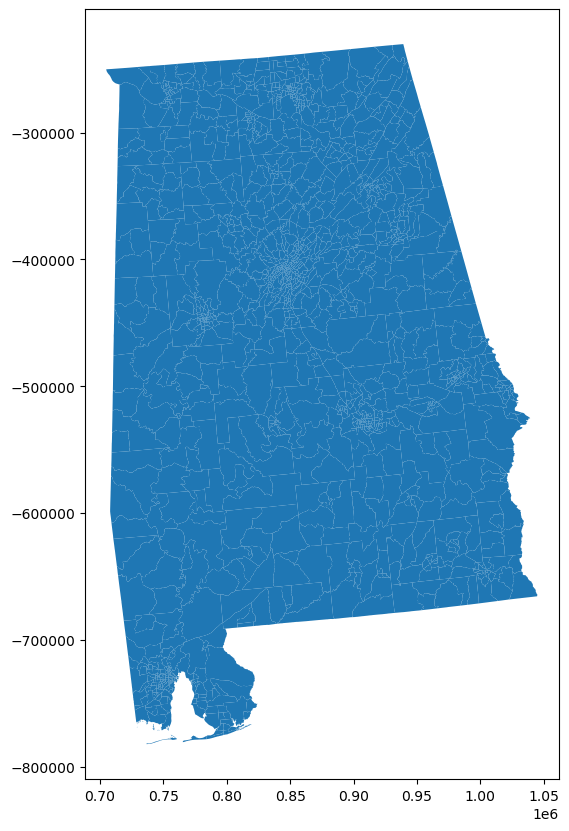

In [28]:
tracts[tracts['STATEFP']=='01'].plot(figsize=(10,10))

Notice that we only have geographical characteristics in our shapefile. 

In [29]:
tracts.columns

Index(['GISJOIN', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME',
       'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

#### Census data
Now, let's take a look at our Census data. 

In [30]:
acs_data.shape

(85395, 95)

In [31]:
acs_data.head()

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,...,AOP8M017,AOP8M018,AOP8M019,AOP8M020,AOP8M021,AOP8M022,AOP8M023,AOP8M024,AOP8M025,AORMM001
0,G0100010020100,2017-2021,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,...,94,50,26,99,49,59,30,27,18,6503.0
1,G0100010020200,2017-2021,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,...,155,232,34,64,52,77,66,31,13,4266.0
2,G0100010020300,2017-2021,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,...,212,87,72,216,198,107,88,13,13,3511.0
3,G0100010020400,2017-2021,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,...,196,154,62,157,113,148,157,36,15,19278.0
4,G0100010020501,2017-2021,AL,NaN,NaN,Alabama,1,Autauga County,1,NaN,...,307,50,108,155,193,317,190,13,56,4359.0


Notice that 
- Most of the column names are coded in a way that we'll need the `xxxx_codebook.txt` file to parse. 
- The `GISJOIN` column is the geometry ID that allows us to join the shapefiles to the data. 

Let's first resolve the column name issue. Open up your codebook, which should be in the same folder as your CSV file. 

</figure>
<img src="https://www.dropbox.com/s/0tseofmb7c2sl79/Screen%20Shot%202023-02-18%20at%2012.49.23%20PM.png?dl=1" alt="drawing" width=900" style="display: block; margin: 0 auto"/>
</figure>

Notice that you have many different "context" columns that allows your to select by different geographies. If you scroll down we can see what each column name translates into: 

</figure>
<img src="https://www.dropbox.com/s/gqos37pt7goayt7/Screen%20Shot%202023-02-18%20at%2012.55.24%20PM.png?dl=1" alt="drawing" width=900" style="display: block; margin: 0 auto"/>
</figure>


#### Column selection 
Notice that our original data selections from the NHGIS portal has been broken down into "tables". 
- Table 1 contains columns related to educational attainment, where each column represents the **number of people in a tract who's highest educational attainment is X**. 
- Table 2 is our per capita income for each tract. 

Let's use **Bachelors degree and above** as our higher ed proxy. Since these are numbers and we probably also want percentages, we'll need the **Total** population 25 years and over. And we'll need the **Per capita income**: 
- AOP8E001:    Total
- AOP8E022:    Bachelor's degree
- AOP8E023:    Master's degree
- AOP8E024:    Professional school degree
- AOP8E025:    Doctorate degree
- AORME001:    Per capita income in the past 12 months (in 2021 inflation-adjusted dollars)
 

 As we saw above, there are 95 columns in our `acs_data` df! I don't really need all of those to proceed as I have a clear, targeted question. Therefore, I will filter my columns in `acs_data` to only contain those I need for my analysis. 

In [71]:
## I also need the GISJOIN so I can join this to my shapefiles
cols_need = ['GISJOIN','AOP8E001','AOP8E022','AOP8E023','AOP8E024','AOP8E025','AORME001']
acs_data_new = acs_data[cols_need]
acs_data_new.head()

,GISJOIN,AOP8E001,AOP8E022,AOP8E023,AOP8E024,AOP8E025,AORME001
0,G0100010020100,1225,164,68,25,12,30934.0
1,G0100010020200,1480,185,82,19,0,26446.0
2,G0100010020300,2415,263,127,0,0,25683.0
3,G0100010020400,2886,599,366,56,14,47804.0
4,G0100010020501,3000,725,372,0,59,30313.0


Let's rename our column names. 

In [72]:
acs_data_new = acs_data_new.rename(columns={'AOP8E001':'population_over_25',
                                            'AOP8E022':'ba',
                                            'AOP8E023':'ma',
                                            'AOP8E024':'prof',
                                            'AOP8E025':'doctorate',
                                            'AORME001':'per_capita_income'})

And create a new column that is the % of people who's highest level of education is a doctorate degree. 

In [73]:
acs_data_new['perc_highered'] = (acs_data_new['ba']+acs_data_new['ma']+acs_data_new['prof']+acs_data_new['doctorate'])/acs_data_new['population_over_25']

In [74]:
acs_data_new.head()

,GISJOIN,population_over_25,ba,ma,prof,doctorate,per_capita_income,perc_highered
0,G0100010020100,1225,164,68,25,12,30934.0,0.219592
1,G0100010020200,1480,185,82,19,0,26446.0,0.193243
2,G0100010020300,2415,263,127,0,0,25683.0,0.161491
3,G0100010020400,2886,599,366,56,14,47804.0,0.358628
4,G0100010020501,3000,725,372,0,59,30313.0,0.385333


Finally, let's join this DF back to the tracts data. 

In [75]:
## I'm not going to use the default join method, which is an inner join
## So no need specify how='inner'
tracts_acs = tracts.merge(acs_data_new, on='GISJOIN')

In [76]:
tracts_acs.head()

,GISJOIN,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,...,Shape_Leng,Shape_Area,geometry,population_over_25,ba,ma,prof,doctorate,per_capita_income,perc_highered
0,G0100010020100,01,001,020100,01001020100,201,Census Tract 201,G5020,S,9825304.0,...,16217.763443,9.853735e+06,"POLYGON ((888437.995 -515917.537, 888435.804 -...",1225,164,68,25,12,30934.0,0.219592
1,G0100010020200,01,001,020200,01001020200,202,Census Tract 202,G5020,S,3320818.0,...,9824.372415,3.326483e+06,"POLYGON ((889844.072 -519142.061, 889844.876 -...",1480,185,82,19,0,26446.0,0.193243
2,G0100010020300,01,001,020300,01001020300,203,Census Tract 203,G5020,S,5349271.0,...,10519.641206,5.358327e+06,"POLYGON ((891383.841 -518871.184, 891367.251 -...",2415,263,127,0,0,25683.0,0.161491
3,G0100010020400,01,001,020400,01001020400,204,Census Tract 204,G5020,S,6384282.0,...,12521.196228,6.392683e+06,"POLYGON ((892527.268 -516528.670, 892531.715 -...",2886,599,366,56,14,47804.0,0.358628
4,G0100010020501,01,001,020501,01001020501,205.01,Census Tract 205.01,G5020,S,6203654.0,...,11422.446991,6.203654e+06,"POLYGON ((895018.440 -518564.833, 895058.489 -...",3000,725,372,0,59,30313.0,0.385333


## 1.4 Descriptive statistics
Let's take a look some descriptive statistics. I'm only going to select a subset of columns I'm interested in for my descriptive analysis. For instance, the `ALAND` (area of land in the tract) is not really relevant in this analysis. 

In [78]:
tracts_acs.columns

Index(['GISJOIN', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME',
       'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'Shape_Leng', 'Shape_Area', 'geometry',
       'population_over_25', 'ba', 'ma', 'prof', 'doctorate',
       'per_capita_income', 'perc_highered'],
      dtype='object')

In [80]:
cols_using = ['population_over_25', 'ba', 'ma', 'prof', 'doctorate',
       'per_capita_income', 'perc_highered']

In [81]:
tracts_acs[cols_using].describe()

,population_over_25,ba,ma,prof,doctorate,per_capita_income,perc_highered
count,85071.000000,85071.000000,85071.000000,85071.000000,85071.000000,84471.000000,84496.000000
mean,2674.841356,550.413031,248.869427,59.274171,40.303664,37033.217045,0.323422
std,1153.890864,422.216415,244.296662,89.015394,64.950049,19682.146277,0.198280
min,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000
25%,1863.000000,236.000000,79.000000,6.000000,0.000000,24702.000000,0.169094
50%,2572.000000,445.000000,173.000000,28.000000,17.000000,32632.000000,0.276120
75%,3371.000000,765.000000,343.000000,75.000000,51.000000,44052.500000,0.445548
max,17537.000000,6300.000000,4325.000000,1702.000000,1452.000000,368910.000000,1.000000


In [82]:
tracts_acs[cols_using].corr()

,population_over_25,ba,ma,prof,doctorate,per_capita_income,perc_highered
population_over_25,1.000000,0.696058,0.562237,0.341527,0.313821,0.159754,0.150828
ba,0.696058,1.000000,0.805498,0.597603,0.527576,0.566200,0.706874
ma,0.562237,0.805498,1.000000,0.662731,0.639144,0.627395,0.741553
prof,0.341527,0.597603,0.662731,1.000000,0.582261,0.665502,0.662961
doctorate,0.313821,0.527576,0.639144,0.582261,1.000000,0.501462,0.610721
per_capita_income,0.159754,0.566200,0.627395,0.665502,0.501462,1.000000,0.791563
perc_highered,0.150828,0.706874,0.741553,0.662961,0.610721,0.791563,1.000000


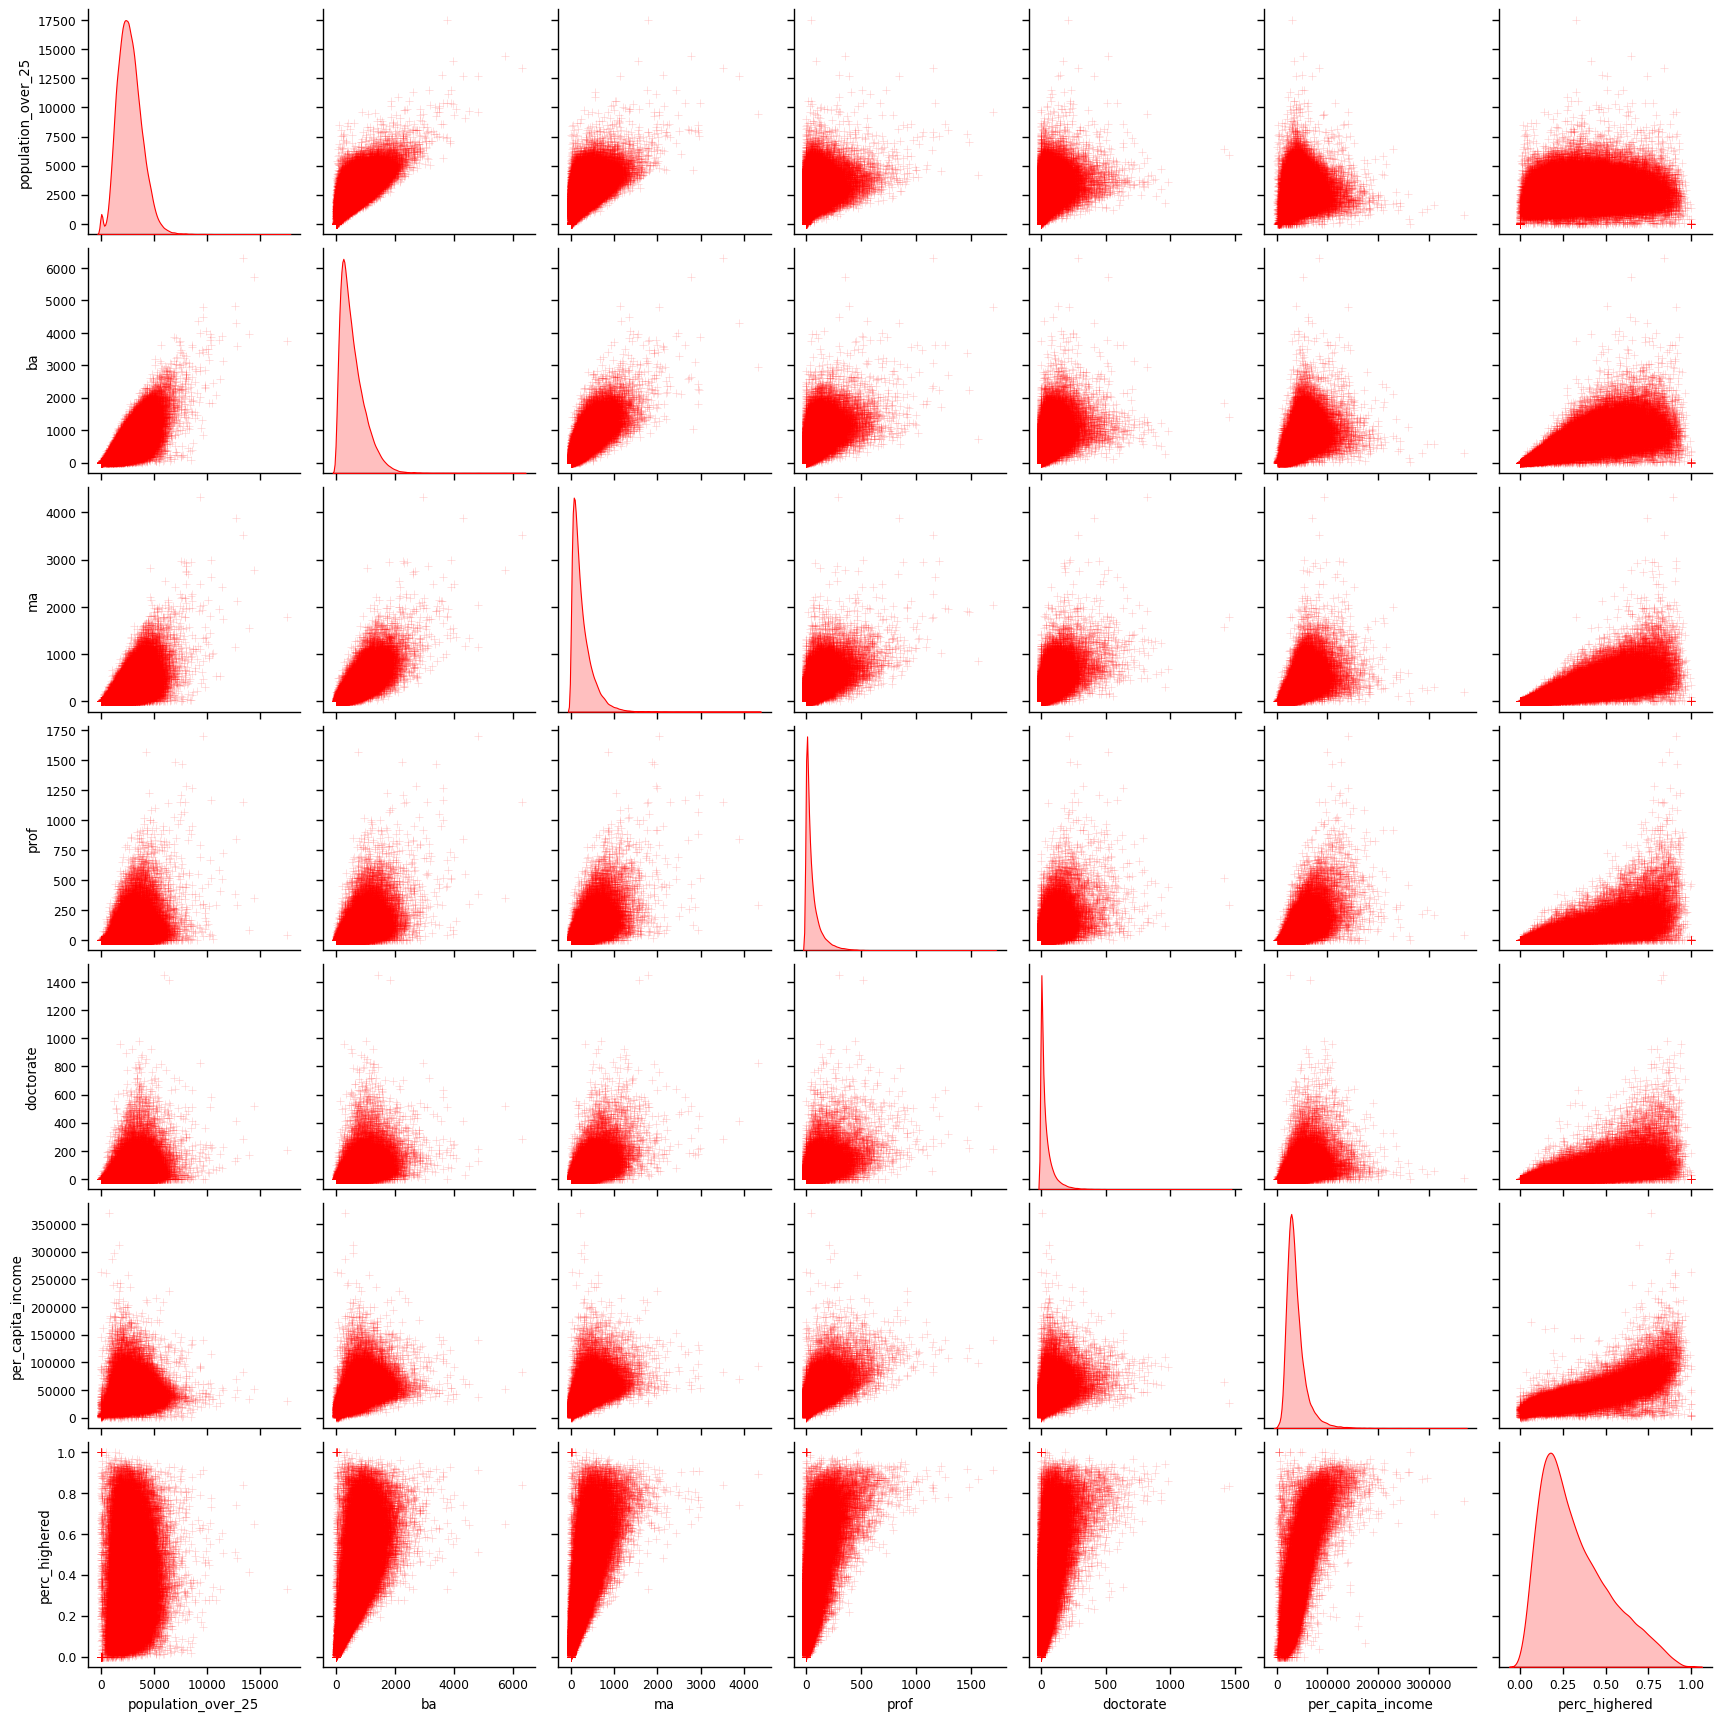

In [100]:
## Even plotting 7 columns took about 11 seconds for me!
## I've set the transparency to be really low at 0.2, so that we can see the density of the points
sns.pairplot(tracts_acs[cols_using],
            markers='+',diag_kind='kde',
            plot_kws={'alpha':0.2,'s':30,'color':'red'},
            diag_kws={'color':'red'})

Oh, pretty!

## Q.1 (2 pts)
List at least three reasons why the above is not a clear figure. What would you do to improve it?

In [151]:
tracts_acs.columns

Index(['GISJOIN', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME',
       'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'Shape_Leng', 'Shape_Area', 'geometry',
       'population_over_25', 'ba', 'ma', 'prof', 'doctorate',
       'per_capita_income', 'perc_highered'],
      dtype='object')

<AxesSubplot: >

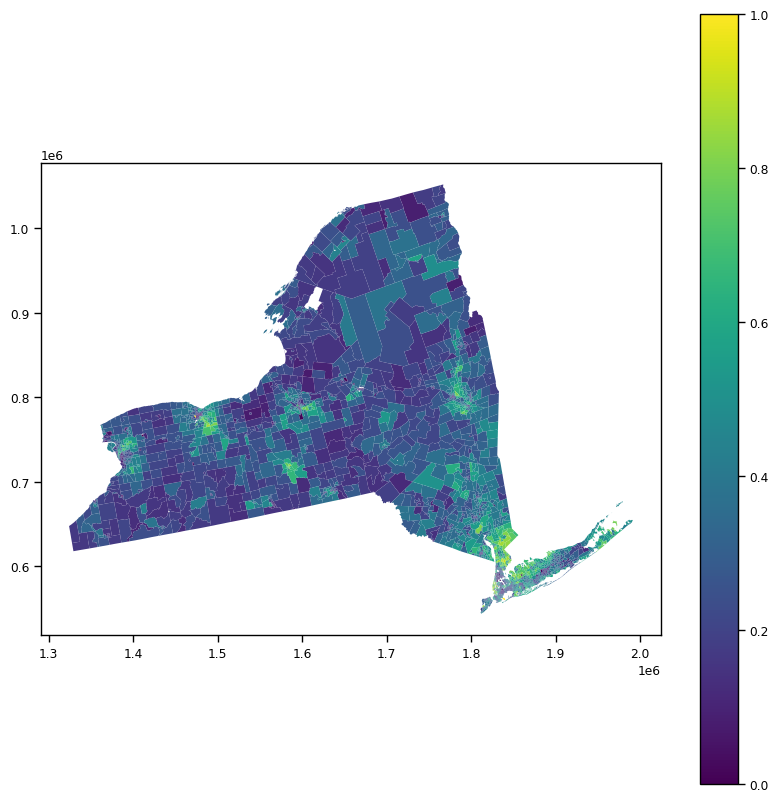

In [152]:
## Just plotting NY state so that the map doesn't take so long to render
tracts_acs[tracts_acs['STATEFP']=='36'].plot(column='perc_highered',figsize=(10,10),legend=True)

# 2. `cenpy`

`cenpy` is python library that allows us to easily use the [US Census Bureau's API](http://www.census.gov/data/developers/data-sets.html) to programmatically read the publicly available data sets into a dataframe or geodataframe. This does not include the Decennial Census and American Community Survey, but other data products from the Bureau such as the Longitudinal Employer-Household Dynamics dataset, the Commodity Flow Survey, Survey of Business Owners, etc. 



#### APIs
What is an API? API stands for Application Programming Interface and essentially is a tool that allow our computers to communicate and use an API host's (in this case, the Census) "servers" (computers) in a regulated manner. There are different kinds of APIs, though most APIs that you will use are called REST APIs. This is when we (the "client") send data to the OSM (the "server") so that its API reads the data and returns the outputs we asked for - the Census data in this case. `cenpy` is acting as facilitator in this case, since the Census's API is a little clunky. 

In [4]:
import cenpy 

## 2.1 Getting ACS data from Cenpy
`cenpy.products` is the tool that we will mostly be interacting with. Here let's explore `cenpy.products.ACS()`

In [5]:
## This creates the "connection" to the latest 5-year ACS data it the API, which is 2019
## cenpy.products.ACS(2018) would give us the 2014-2018 ACS data
acs_cp= cenpy.products.ACS()

We then need to tell cenpy how to extract the data based on geography. We can
- `from_place()`
- `from_county()`
- `from_state()`
- `from_csa()`
- `from_msa()`

We willa also need to tell cenpy which [ACS Table Lists and Shells](https://www.census.gov/programs-surveys/acs/technical-documentation/table-shells.2019.html#list-tab-LO1F1MU1CQP3YOHD2T) we want. Luckily, we already have this from the NHGIS codebook. 

Notice in your code that **Source code: B15003**. The "source" here is the original Census table. 

Lastly, we need to indicate the geography level.

In [156]:
## Note, because this a free API, it is limited to
acs_cp_data = acs_cp.from_place('New York, NY',
                                level='tract',
                                variables=['B15003'])


/Users/wenfeixu/anaconda3/envs/gds_py/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1784: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values


Matched: New York, NY to New York city within layer Incorporated Places


/Users/wenfeixu/anaconda3/envs/gds_py/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1784: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/var/folders/cy/x4wtz_6d12s786ynvlhf_sf00000gq/T/ipykernel_84568/3466317001.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  acs_cp_data = acs_cp.from_place('New York, NY',


In [160]:
acs_cp_data.head()

,GEOID,geometry,B15003_001E,B15003_002E,B15003_003E,B15003_004E,B15003_005E,B15003_006E,B15003_007E,B15003_008E,...,B15003_020E,B15003_021E,B15003_022E,B15003_023E,B15003_024E,B15003_025E,state,county,tract,perc_highered
0,36085020801,"POLYGON ((-8262278.990 4946228.710, -8261996.3...",6256.0,142.0,0.0,0.0,0.0,0.0,0.0,0.0,...,816.0,608.0,1116.0,510.0,117.0,30.0,36,085,020801,0.283408
1,36085017012,"POLYGON ((-8257822.870 4945745.990, -8257700.4...",3288.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,372.0,178.0,681.0,294.0,89.0,71.0,36,085,017012,0.345195
2,36085031901,"POLYGON ((-8256173.450 4957701.750, -8256171.1...",1608.0,40.0,0.0,0.0,0.0,14.0,70.0,0.0,...,211.0,79.0,184.0,85.0,0.0,0.0,36,085,031901,0.167289
3,36085031902,"POLYGON ((-8256709.900 4959461.880, -8256698.5...",3010.0,16.0,0.0,1.0,31.0,0.0,0.0,0.0,...,323.0,203.0,601.0,182.0,12.0,25.0,36,085,031902,0.272425
4,36085014606,"POLYGON ((-8254594.160 4948740.120, -8254529.4...",4407.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,385.0,353.0,1071.0,824.0,35.0,16.0,36,085,014606,0.441570


In [161]:
## They are all in the same order as the NHGIS data, so I can just use the same columns
acs_cp_data['perc_highered'] = (acs_cp_data['B15003_022E']+acs_cp_data['B15003_023E']+acs_cp_data['B15003_024E']+acs_cp_data['B15003_025E'])/acs_cp_data['B15003_001E']

<AxesSubplot: >

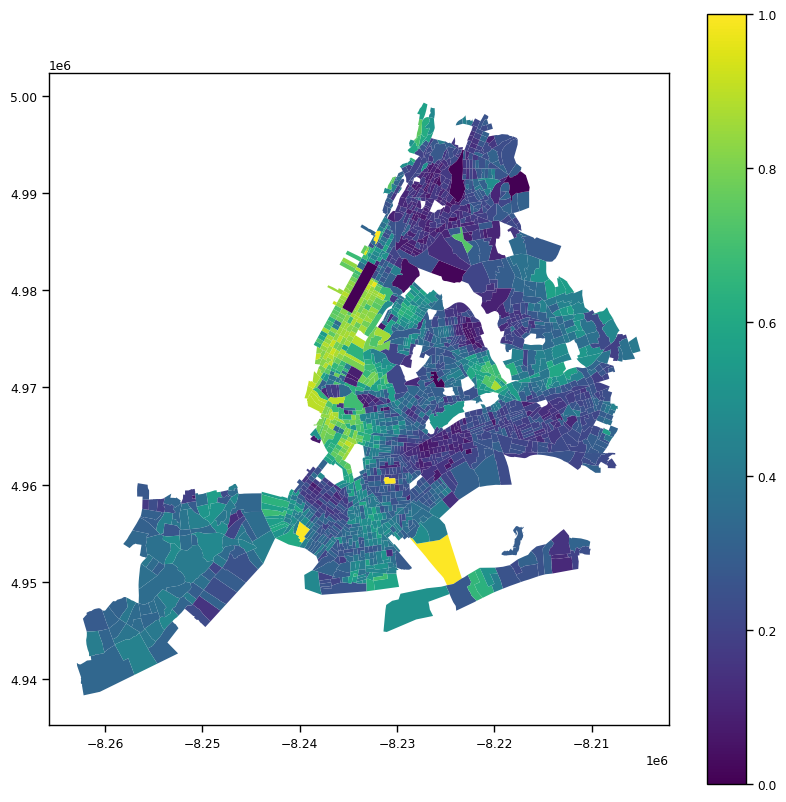

In [162]:
acs_cp_data.plot(column='perc_highered',figsize=(10,10),legend=True)

Pretty neat! There are certain limitations here (we can't get the whole of NY state or the country, given the API's limitations, for instance), but cenpy is a pretty easy to use out of the box tool for some fast case studies uses. 

## Q.2 
Using the [ACS table](https://www.census.gov/programs-surveys/acs/technical-documentation/table-shells.2019.html#list-tab-LO1F1MU1CQP3YOHD2T) lookup page
- Find the table (in "2019 ACS Table List) for the **HISPANIC OR LATINO ORIGIN BY RACE** table 
- For the state of Massachusetts, use the `.from_state()` function with your `acs_cp` engine. 

Call this geodataframe `ma`.


(This query took about 1 minute for me.)

In [79]:
### INSERT YOUR CODE HERE
ma = acs_cp.from_state('Massachusetts', 
                                    level='tract',
                                variables=['B03002'])

/Users/wenfeixu/anaconda3/envs/gds_py/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1784: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/Users/wenfeixu/anaconda3/envs/gds_py/lib/python3.9/site-packages/cenpy/products.py:767: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(state, variables, level, "States", **kwargs)


In [80]:
ma.head()

,GEOID,geometry,B03002_001E,B03002_002E,B03002_003E,B03002_004E,B03002_005E,B03002_006E,B03002_007E,B03002_008E,...,B03002_016E,B03002_017E,B03002_018E,B03002_019E,B03002_020E,B03002_021E,NAME,state,county,tract
0,25013813204,"POLYGON ((-8093826.220 5170643.730, -8093645.2...",3169.0,3026.0,2841.0,61.0,0.0,45.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,"Census Tract 8132.04, Hampden County, Massachu...",25,013,813204
1,25013812401,"POLYGON ((-8092334.760 5176904.440, -8092318.2...",6451.0,6390.0,5878.0,174.0,0.0,154.0,0.0,0.0,...,0.0,0.0,35.0,0.0,0.0,0.0,"Census Tract 8124.01, Hampden County, Massachu...",25,013,812401
2,25013813207,"POLYGON ((-8087979.160 5174341.850, -8087977.1...",4982.0,4498.0,4177.0,80.0,0.0,58.0,0.0,0.0,...,0.0,0.0,18.0,0.0,0.0,0.0,"Census Tract 8132.07, Hampden County, Massachu...",25,013,813207
3,25013801102,"POLYGON ((-8080903.360 5175480.010, -8080733.1...",1186.0,534.0,293.0,164.0,8.0,37.0,0.0,25.0,...,0.0,0.0,117.0,44.0,18.0,26.0,"Census Tract 8011.02, Hampden County, Massachu...",25,013,801102
4,25013813403,"POLYGON ((-8074618.820 5169649.040, -8074574.2...",3870.0,3799.0,3298.0,107.0,0.0,343.0,0.0,0.0,...,0.0,0.0,28.0,13.0,13.0,0.0,"Census Tract 8134.03, Hampden County, Massachu...",25,013,813403


Now calculate the percentage "Non Hispanic or Latino White Alone" in the state.

In [88]:
### INSERT YOUR CODE HERE
ma['perc_white'] = (ma['B03002_003E'])/ma['B03002_001E']

And create a plot of the White percentage across the state. 

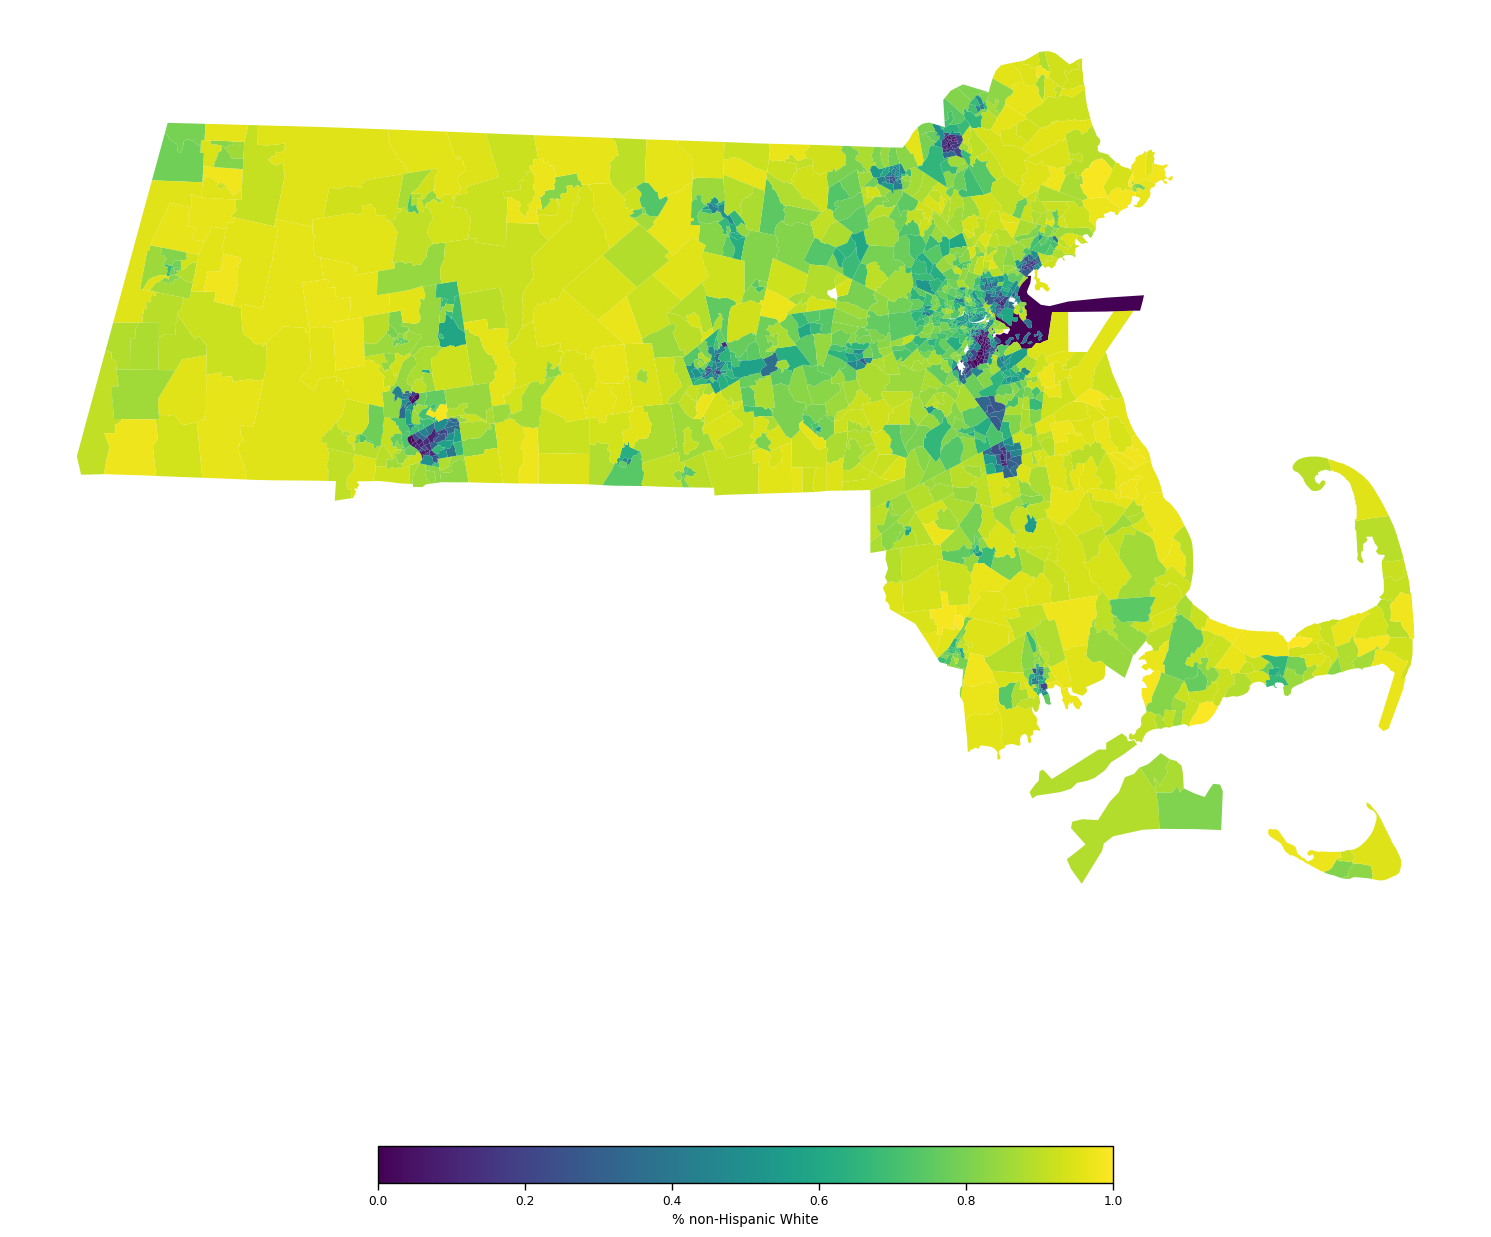

In [89]:
## KEEP THIS CODE IN
fig, ax = plt.subplots(figsize=(15,15))

ma.plot(column='perc_white',ax=ax,legend=True,legend_kwds={'label':'% non-Hispanic White',
                                                            'orientation':'horizontal',
                                                            'shrink': 0.5})
ax.set_axis_off()

## Use tight_layout to remove the white space around the plot
plt.tight_layout()


## I forgot to show you all how to save down your plots!
fig.savefig('MA_perc_white.png')   # save the figure to file


## 3. Socrata and Socrata APIs
Many government open data portals were built by the same company, Socrata (acquired a few years back by Tyler Technologies), which created the infrastructure and front-end interface to access open government data. 

Here, we are going to re-visit our NYCHA developments dataset [here](https://data.cityofnewyork.us/Housing-Development/Map-of-NYCHA-Developments/i9rv-hdr5).


You may have noticed that, when we go to export data, that there is a **SODA API** section: 
</figure>
<img src="https://www.dropbox.com/s/7pvi2f0jnbrlwdt/Screen%20Shot%202023-02-18%20at%205.57.09%20PM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>

SODA is Socrata's API for allowing users from researchers to (more often) people building tools and applications to access open-portal data. This is most useful when you have to programmatically connect your data export to something else. For instance, if you're running a website that needs to update data in real-time or if you don't want to download an updated dataset each time, you can connect your notebook or app to this API. Click to expand the **SODA API** section: 
</figure>
<img src="https://www.dropbox.com/s/ure1ep5y7ussvxs/Screen%20Shot%202023-02-18%20at%205.57.44%20PM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>


**Copy the API endpoint URL**. 

## 3.1 API endpoint to GeoDataFrame

We can pretty easily this JSON file into a geodataframe. FYI, a JSON stands for "JavaScript Object Notation" and is a file format that was desisgned for the JavaScript language, but is easily translated to other formats that we know well. 

The good thing is that pandas has a `pd.read_json()` function that will allow us read this JSON as a DF and eventually turn it into a geodataframe. 

In [33]:
nycha = pd.read_json('https://data.cityofnewyork.us/resource/5j2e-zhmb.json')


In [34]:
nycha.head()

,the_geom,developmen,tds_num,borough
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",1010 EAST 178TH STREET,180,BRONX
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",HOLMES TOWERS,159,MANHATTAN
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",104-14 TAPSCOTT STREET,242,BROOKLYN
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",1162-1176 WASHINGTON AVENUE,233,BRONX
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-7...",131 SAINT NICHOLAS AVENUE,154,MANHATTAN


In [35]:
nycha.shape

(277, 4)

Notice that there is a **the_geom** column that looks like it might have geometry information. 

In [36]:
## Ignore the warnings 
nycha['the_geom'].head()

0    {'type': 'MultiPolygon', 'coordinates': [[[[-7...
1    {'type': 'MultiPolygon', 'coordinates': [[[[-7...
2    {'type': 'MultiPolygon', 'coordinates': [[[[-7...
3    {'type': 'MultiPolygon', 'coordinates': [[[[-7...
4    {'type': 'MultiPolygon', 'coordinates': [[[[-7...
Name: the_geom, dtype: object

We are going to turn these strings, into Shapely geometries, which is the only piece of our data that is missing so we can turn this into a geometry. 

In [38]:
from shapely.geometry import shape

## the apply method applies the function to each row of the dataframe
nycha['the_geom'] = nycha['the_geom'].apply(shape)

## I'm going to use the GeoDataFrame method to create a GeoDataFrame
nycha_geo = gpd.GeoDataFrame(nycha,geometry='the_geom')


In [39]:
nycha_geo.head()

,the_geom,developmen,tds_num,borough
0,"MULTIPOLYGON (((-73.88092 40.84050, -73.88068 ...",1010 EAST 178TH STREET,180,BRONX
1,"MULTIPOLYGON (((-73.94445 40.78071, -73.94456 ...",HOLMES TOWERS,159,MANHATTAN
2,"MULTIPOLYGON (((-73.92039 40.66498, -73.92074 ...",104-14 TAPSCOTT STREET,242,BROOKLYN
3,"MULTIPOLYGON (((-73.90694 40.83009, -73.90705 ...",1162-1176 WASHINGTON AVENUE,233,BRONX
4,"MULTIPOLYGON (((-73.95286 40.80376, -73.95317 ...",131 SAINT NICHOLAS AVENUE,154,MANHATTAN


<AxesSubplot: >

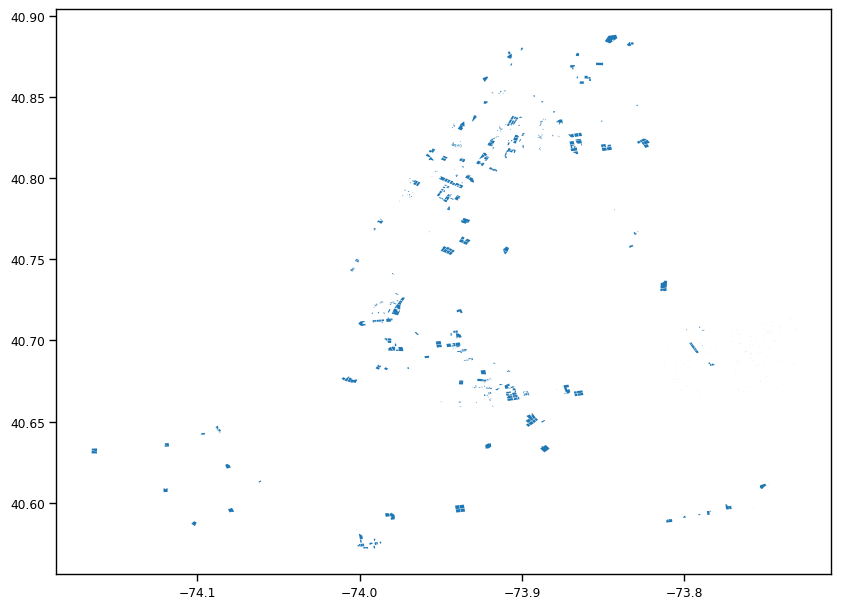

In [40]:
## Faint, but these are our buildings

nycha_geo.plot(figsize=(10,10))

## 3.2 Filtering
The SODA API allows us to filter data from the endpoint url. Why might we want to do this? For one, there are very large datasets such as the [311 Service Requests dataset](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9) (with 32 million rows) or the [Open Parking and Camera Violations](https://data.cityofnewyork.us/City-Government/Open-Parking-and-Camera-Violations/nc67-uf89) (with 93 million rows!) that are difficult to work with due to their size. 

There are two ways to filter data using the SODA API: 
- [Simple Filters](https://dev.socrata.com/docs/filtering.html)
- [SoQL Queries](https://dev.socrata.com/docs/queries/)


**Both of these filters are text we append to the original endpoint URL.**

### 3.2.1 Simple Filters
Any column in the dataset can be used as a filter for specific values within that column and is in the format :

`http://yourendpointurl.json?col_name=element_name`

In [54]:
nycha_url_orig = "https://data.cityofnewyork.us/resource/5j2e-zhmb.json"

## Note, this query is CASE-SENSITIVE! 
## If the column name is in all caps, it must be in all caps here
## If the value of interest is in all caps, it must be in all caps here
nycha_url_mh = "https://data.cityofnewyork.us/resource/5j2e-zhmb.json?borough=MANHATTAN"

In [55]:
nycha_mh = pd.read_json(nycha_url_mh)
nycha_mh['the_geom'] = nycha_mh['the_geom'].apply(shape)
nycha_mh_geo = gpd.GeoDataFrame(nycha_mh,geometry='the_geom')

<AxesSubplot: >

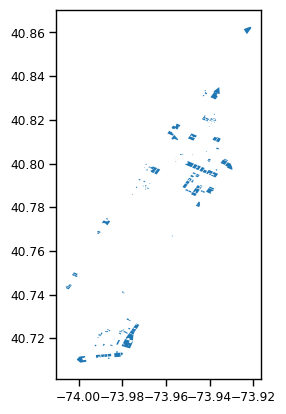

In [56]:
nycha_mh_geo.plot()

You can join multiple queries with an `&`. 

In [58]:
nycha_url_mh_jeff = "https://data.cityofnewyork.us/resource/5j2e-zhmb.json?borough=MANHATTAN&developmen=JEFFERSON"
nycha_mh_jeff = pd.read_json(nycha_url_mh_jeff)
nycha_mh_jeff['the_geom'] = nycha_mh_jeff['the_geom'].apply(shape)
nycha_mh_jeff_geo = gpd.GeoDataFrame(nycha_mh_jeff,geometry='the_geom')

<AxesSubplot: >

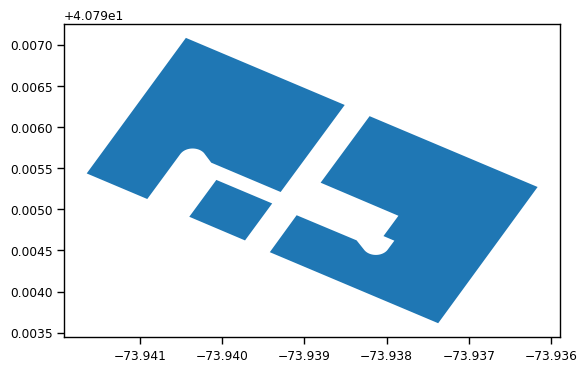

In [59]:
nycha_mh_jeff_geo.plot()

### 3.2.2 SoQL Queries
The “Socrata Query Language” (SoQL) is a simple, SQL-like query language specifically designed for making it easy to work with data on the web. If you're familiar with SQL, the following may be familiar. And even if you're not, this will seem pretty intuitive. 

Here are all the different parameters that you can use in this query: 
</figure>
<img src="https://www.dropbox.com/s/r4edgdtyzm2vrxn/Screen%20Shot%202023-02-19%20at%2010.09.27%20AM.png?dl=1" alt="drawing" width="800" style="display: block; margin: 0 auto"/>
</figure>


**One key formatting difference here is the use of white space, which allowed in the query but must be translated into `%20` for URL purposes, since no white spaces are allowed in the URL.** I am using the `.replace("to_be_replace_str","new_str")` function to replace empty spaces with `%20`.

The same filtering for Manhattan and the Jefferson Development we did above would look like this: 


In [90]:
## Note the use of single vs double quotes here, since I need to include a single quote in the query
nycha_url_mh_soql = "https://data.cityofnewyork.us/resource/5j2e-zhmb.json?$where=borough='MANHATTAN' and developmen='JEFFERSON'".replace(" ", "%20")

nycha_mh_jeff2 = pd.read_json(nycha_url_mh_soql)
nycha_mh_jeff2['the_geom'] = nycha_mh_jeff2['the_geom'].apply(shape)
nycha_mh_jeff2_geo = gpd.GeoDataFrame(nycha_mh_jeff2,geometry='the_geom')

<AxesSubplot: >

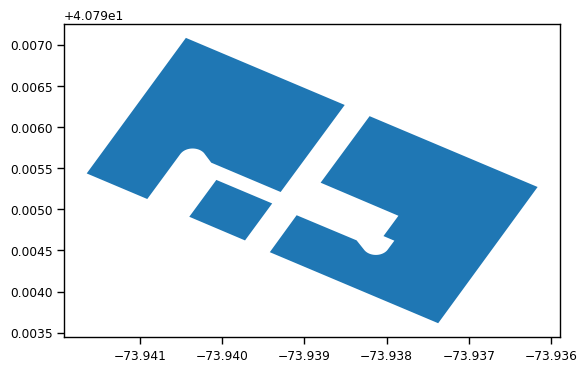

In [75]:
nycha_mh_jeff2_geo.plot()

### 3.2.3 A more complex SoQL query

Let's say we wanted to look at the [311 Service Requests data](https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). Here are the ways I want to filter the dataset based on the columns available: 
- **Created Date** is since Feb 2023
- **Complaint Type**  is `Noise - Residential`
- **Descriptor** is `Loud Music/Party` 

Looking at the [311 API docs](https://dev.socrata.com/foundry/data.cityofnewyork.us/erm2-nwe9) will give you some example queries and will also show you the correct column names for the API. You can also find the column names when you click on each column in the "Columns in the Dataset" section of the data homepage. 

</figure>
<img src="https://www.dropbox.com/s/wlrh8jzes9dcsvv/Screen%20Shot%202023-02-19%20at%2011.55.08%20AM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>


In [118]:
servicereq_url = "https://data.cityofnewyork.us/resource/erm2-nwe9.json?$where=created_date between '2023-02-01T0:00:00.000' and '2023-02-19T0:00:00.000' and complaint_type='Noise - Residential' and descriptor='Loud Music/Party'".replace(" ", "%20")
servicereq = pd.read_json(servicereq_url)
	


Let's turn this into a GeoDataFrame

In [120]:
servicereq_geo = gpd.GeoDataFrame(servicereq, 
                                    geometry=gpd.points_from_xy(servicereq['longitude'], servicereq['latitude']))

<AxesSubplot: >

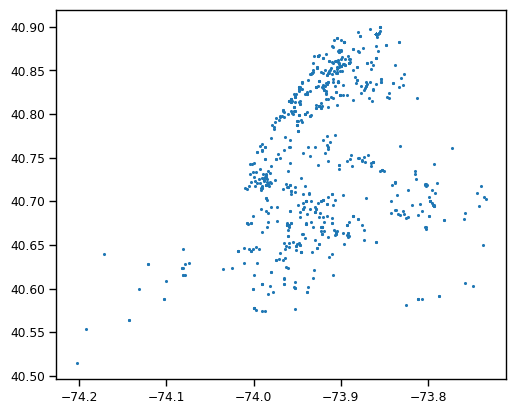

In [122]:
servicereq_geo.plot(markersize=2)

## 3.3 `offset` and `limit`
The issue with using this endpoint is that we are limited to 1000 rows per query. You will see the documentation refer to this as "pages" sometimes.


In [123]:
servicereq.shape

(1000, 33)

What to do? 

One way to get around this is to use the `limit` and `offset` parameters. From the SODA documentation: 

>The $offset parameter is most often used in conjunction with $limit to page through a dataset. The $offset is the number of records into a dataset that you want to start, indexed at 0. For example, to retrieve the “4th page” of records (records 151 - 200) where you are using $limit to page 50 records at a time, you’d ask for an $offset of 150.

In [128]:
servicereq_url_offset = "https://data.cityofnewyork.us/resource/erm2-nwe9.json?$limit=50&$offset=150&$where=created_date between '2023-02-01T0:00:00.000' and '2023-02-19T0:00:00.000' and complaint_type='Noise - Residential' and descriptor='Loud Music/Party'".replace(" ", "%20")
servicereq_offset = pd.read_json(servicereq_url_offset)


This is now 50 entries of the "4th page".

In [ ]:
servicereq_offset

So, to get all the data, what we can do is run a loop to change that offset amount iteratively. 

OR

If we are getting the data just once, we can use the filter function, accessible through the  "View Data" button on the dataset's home page. 

</figure>
<img src="https://www.dropbox.com/s/oz26ti7y164pm8r/Screen%20Shot%202023-02-19%20at%2012.35.21%20PM.png?dl=1" alt="drawing" width="1000" style="display: block; margin: 0 auto"/>
</figure>



### 3.3.1 A short review of loops

In [130]:
my_counter = np.arange(0,1000,50)
print(my_counter)


[  0  50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850
 900 950]


In [132]:
# The for loop will iterate through each value in the list
# The {} is a placeholder for the value in the list within a string

for i in my_counter: 
    print("Current Counter is now at {}".format(i))

Current Counter is now at 0
Current Counter is now at 50
Current Counter is now at 100
Current Counter is now at 150
Current Counter is now at 200
Current Counter is now at 250
Current Counter is now at 300
Current Counter is now at 350
Current Counter is now at 400
Current Counter is now at 450
Current Counter is now at 500
Current Counter is now at 550
Current Counter is now at 600
Current Counter is now at 650
Current Counter is now at 700
Current Counter is now at 750
Current Counter is now at 800
Current Counter is now at 850
Current Counter is now at 900
Current Counter is now at 950


In [137]:
## reset i to 0
i = 0
## The while loop will continue to run until the condition is no longer true
while i < 1000:
    print("Current Counter is now at {}".format(i))
    
    ## This is an example of an incrementer
    ## An incrementer is a variable that is used to increment a value
    ## After each iteration, the value of i will increase by 50
    i = i + 50

Current Counter is now at 0
Current Counter is now at 50
Current Counter is now at 100
Current Counter is now at 150
Current Counter is now at 200
Current Counter is now at 250
Current Counter is now at 300
Current Counter is now at 350
Current Counter is now at 400
Current Counter is now at 450
Current Counter is now at 500
Current Counter is now at 550
Current Counter is now at 600
Current Counter is now at 650
Current Counter is now at 700
Current Counter is now at 750
Current Counter is now at 800
Current Counter is now at 850
Current Counter is now at 900
Current Counter is now at 950


In [145]:
for i in np.arange(0,100000,50):
    print("Current Counter is now at {}".format(i))
    i = i + 50

    if i >1000 :
        print("We are done")
        break
    

Current Counter is now at 0
Current Counter is now at 50
Current Counter is now at 100
Current Counter is now at 150
Current Counter is now at 200
Current Counter is now at 250
Current Counter is now at 300
Current Counter is now at 350
Current Counter is now at 400
Current Counter is now at 450
Current Counter is now at 500
Current Counter is now at 550
Current Counter is now at 600
Current Counter is now at 650
Current Counter is now at 700
Current Counter is now at 750
Current Counter is now at 800
Current Counter is now at 850
Current Counter is now at 900
Current Counter is now at 950
Current Counter is now at 1000
We are done


To programmatically run different queries, I just going to 

This might take a while to run and might not work at all given our 1000 an hour limit. :/

In [149]:
## I actually don't know what the upper range is for my dataset, but I will just use 100,000
# offset_list = np.arange(0,100000,50)

# I'm actually going to use a smaller list for demo and not overloading the API
offset_list_smaller = np.arange(0,200,50)

list_of_dfs = []

for offset in offset_list_smaller:
    servicereq_url_offset = "https://data.cityofnewyork.us/resource/erm2-nwe9.json?$limit=50&$offset={}&$where=created_date between '2023-02-01T0:00:00.000' and '2023-02-19T0:00:00.000' and complaint_type='Noise - Residential' and descriptor='Loud Music/Party'".replace(" ", "%20").format(offset)
    servicereq_offset = pd.read_json(servicereq_url_offset)

    ## Here I am creating a list of dataframes by appending each dataframe to the list
    list_of_dfs.append(servicereq_offset)

I now have a list of dataframes.

In [ ]:
list_of_dfs

In [ ]:
## pd.concat will concatenate the dataframes in the list
## to create a single dataframe
servicereq_final = pd.concat(list_of_dfs)

If I were to really try and get all this data, I'd put a `sleep()` call from the library `time` to pause my code from running the next line for a certain amount of time. 

In [ ]:
import time

list_of_dfs = []

for offset in offset_list_smaller:
    servicereq_url_offset = "https://data.cityofnewyork.us/resource/erm2-nwe9.json?$limit=50&$offset={}&$where=created_date between '2023-02-01T0:00:00.000' and '2023-02-19T0:00:00.000' and complaint_type='Noise - Residential' and descriptor='Loud Music/Party'".replace(" ", "%20").format(offset)
    servicereq_offset = pd.read_json(servicereq_url_offset)

    ## Here I am creating a list of dataframes by appending each dataframe to the list
    list_of_dfs.append(servicereq_offset)
    
    ## I am adding a sleep timer to avoid overloading the API
    ## The sleep timer will pause the code for 3 minutes
    ## This gives me 3 min/run for each 50 records = 20 queries per hour = 1000 records per hour
    time.sleep(180)
    if servicereq_offset.shape[0] =0:
        print("We are done")
        break

servicereq_final = pd.concat(list_of_dfs)

Lastly! Don't think this means we can just get all the data at once. Each query we make "costs" the API provider resources. To ensure that everyone is able to use the API, the provider will limit your capacity to query. 

>## Throttling and Application Tokens
>Hold on a second! Before you go storming off to make the next great open data app, you should understand how SODA handles throttling. You can make a certain number of requests without an application token, but they come from a shared pool and you’re eventually going to get cut off.
>
>If you want more requests, sign up for a Socrata account, then register for an application token and your application will be granted up to 1000 requests per rolling hour period. If you need even more than that, special exceptions are made by request. You can contact our support team here.

In [146]:
servicereq_url_offset = "https://data.cityofnewyork.us/resource/erm2-nwe9.json?$limit=50&$offset=5000000&$where=created_date between '2023-02-01T0:00:00.000' and '2023-02-19T0:00:00.000' and complaint_type='Noise - Residential' and descriptor='Loud Music/Party'".replace(" ", "%20").format(offset)
servicereq_offset = pd.read_json(servicereq_url_offset)

In [148]:
servicereq_offset.shape

(0, 0)

## Q.3 Querying and Concatenating
- Using the [Film Permits](https://data.cityofnewyork.us/City-Government/Film-Permits/tg4x-b46p) dataset with the following limits: 
    - The **StartDateTime** should be after July 1, 2022
    - The **Category** should be `Television`. 
- Create a list of two dataframes with 50 rows per "page"
- Concatenate these two dataframes together into one dataframe
- Show the first 5 rows of the new dataframe.



Using the [Film Permits](https://data.cityofnewyork.us/City-Government/Film-Permits/tg4x-b46p) dataset with the following limits: 

- The **StartDateTime** should be after July 1, 2022
- The **Category** should be `Television`. 

In [153]:
## INSERT YOUR CODE HERE
film_url1 = "https://data.cityofnewyork.us/resource/tg4x-b46p.json?$limit=50&$offset=0&$where=startdatetime between '2022-07-01T0:00:00.000' and '2023-02-19T0:00:00.000' ".replace(" ", "%20")
film1 = pd.read_json(film_url1)

film_url2 = "https://data.cityofnewyork.us/resource/tg4x-b46p.json?$limit=50&$offset=50&$where=startdatetime between '2022-07-01T0:00:00.000' and '2023-02-19T0:00:00.000' and category='Television'".replace(" ", "%20")
film2 = pd.read_json(film_url2)



Concatenate these two dataframes together into one dataframe

In [154]:
## INSERT YOUR CODE HERE

list_of_film_dfs = [film1,film2]
films = pd.concat(list_of_film_dfs)


Show the first 5 rows of the new dataframe.


In [155]:
## INSERT YOUR CODE HERE
films.head()

,eventid,eventtype,startdatetime,enddatetime,enteredon,eventagency,parkingheld,borough,communityboard_s,policeprecinct_s,category,subcategoryname,country,zipcode_s
0,658872,Shooting Permit,2022-07-01T05:00:00.000,2022-07-01T14:00:00.000,2022-06-29T07:19:39.000,"Mayor's Office of Film, Theatre & Broadcasting",WEST 48 STREET between 6 AVENUE and 7 AVENUE,Manhattan,5,18,Television,News,United States of America,"10036, 10105"
1,657788,Shooting Permit,2022-07-01T06:00:00.000,2022-07-01T21:00:00.000,2022-06-23T11:53:38.000,"Mayor's Office of Film, Theatre & Broadcasting",ARTHUR KILL ROAD between CHEMICAL LANE and IND...,Staten Island,3,123,Film,Feature,United States of America,10309
2,658192,Shooting Permit,2022-07-01T06:00:00.000,2022-07-01T23:59:00.000,2022-06-24T18:27:55.000,"Mayor's Office of Film, Theatre & Broadcasting","30 STREET between 47 AVENUE and 48 AVENUE, 30...",Queens,2,108,Television,Episodic series,United States of America,11101
3,658637,Shooting Permit,2022-07-01T07:00:00.000,2022-07-01T23:00:00.000,2022-06-28T10:36:02.000,"Mayor's Office of Film, Theatre & Broadcasting",EAST 68 STREET between PARK AVENUE and MADIS...,Manhattan,8,19,Television,Cable-episodic,United States of America,"10021, 10065"
4,658771,Shooting Permit,2022-07-01T07:00:00.000,2022-07-01T19:30:00.000,2022-06-28T15:29:37.000,"Mayor's Office of Film, Theatre & Broadcasting",5 AVENUE between EAST 103 STREET and EAST 10...,Manhattan,"11, 64, 8","19, 22, 23",Television,Episodic series,United States of America,"10029, 10128"
